In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-linear-multiple-regression/Marketing_Data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv('/kaggle/input/marketing-linear-multiple-regression/Marketing_Data.csv')

In [4]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [5]:
X= df.values[:, 0:3]
Y= df.values[:, 3]

**Plotting Correlation:**

<AxesSubplot:>

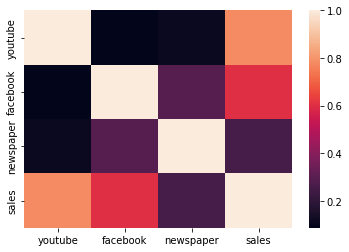

In [6]:
sns.heatmap(df.corr())

**Youtube has the highest correlation with Sales**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [8]:
lr= LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)

In [11]:
print(y_pred)

[17.52141042 16.23122533 22.97176673 24.76519625 18.38179973  9.79357533
 27.59886717 28.82479792 23.01440131 19.02138231 13.2616163  14.23676584
  9.12704131 13.16569662 10.17617827 16.10227003 19.90311686 25.7349966
 11.94179992 13.87531242 19.66983931 10.95765332 22.159511   27.71784533
 20.50488692 11.93980581 19.41153411 15.85023272 23.31629986 20.30444157
 25.56649745 18.32920627  6.61987167 20.52480116 19.00096139 11.97165906
 23.20178746 13.91952564  8.01037735 15.15006357 23.98848147 21.46639109
  9.8746956  11.49303953  8.13513019 19.44690824 16.53737074 17.55118836
  7.58148542 18.13851226 12.22319782 28.36376524]


**R squared score:**

In [12]:
r2=r2_score(y_test, y_pred)

In [13]:
r2

0.9290597051219649

In [14]:
df['sales_pred']= lr.predict(X)

In [15]:
df['difference']= df['sales']-df['sales_pred']
df['difference%']= ((df['sales']-df['sales_pred'])/df['sales'])*100

In [16]:
df.describe()

,youtube,facebook,newspaper,sales,sales_pred,difference,difference%
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807,16.854831,0.067976,-3.969953
std,102.449597,17.913532,24.902918,6.314608,5.839177,1.999572,46.236541
min,0.840000,0.000000,0.360000,1.920000,4.669839,-10.829047,-564.012859
25%,91.080000,11.700000,13.740000,12.540000,12.105723,-0.863440,-5.748303
50%,179.760000,26.760000,31.080000,15.480000,16.610933,0.392769,2.194405
75%,262.980000,43.680000,50.880000,20.820000,21.151820,1.463836,7.939574
max,355.680000,59.520000,121.080000,32.400000,29.445994,3.318682,34.205864


In [17]:
df.head()

,youtube,facebook,newspaper,sales,sales_pred,difference,difference%
0,84.72,19.20,48.96,12.60,11.256750,1.343250,10.660717
1,351.48,33.96,51.84,25.68,25.660168,0.019832,0.077228
2,135.48,20.88,46.32,14.28,13.773278,0.506722,3.548473
3,116.64,1.80,36.00,11.52,9.337247,2.182753,18.947512
4,318.72,24.00,0.36,20.88,22.159511,-1.279511,-6.127926
